# 투자전략 1: 모멘텀 투자 

![모멘텀 투자](img/momentum.png)

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import logging
from IPython.display import Image

In [2]:
pd.options.display.max_columns = 100 # was 20
pd.options.display.max_rows = 200 # was 60

In [3]:
logger = logging.getLogger('zero_remove_logger')

<h2>KRX에서 KOSPI200 종목들 이름과 코드 가져옴.</h2>
코드 참고: http://excelsior-cjh.tistory.com/109

In [28]:
code_df = pd.read_csv("KOSPI200.csv", encoding="EUC-KR")

In [29]:
col_kor2eng = {"회사명":"company", "종목코드":"id"}
code_df.rename(columns=col_kor2eng, inplace=True)

In [30]:
code_df = code_df[["company", "id"]]

In [32]:
code_df["id"] = code_df["id"].astype(str).apply(lambda x: x.zfill(6))

In [271]:
code_df.head()

,company,id
0,효성중공업,298040
1,HDC현대산업개발,294870
2,셀트리온,068270
3,SK케미칼,285130
4,BGF리테일,282330


<h2>네이버 금융에서 KOSPI200 종목 3년치 데이터 크롤링 함.</h2>

In [313]:
companies_names = []

for name in code_df['company']:
    companies_names.append(name)

In [314]:
companies_ids = []

for i in code_df['id']:
    companies_ids.append(i)

In [315]:
len(companies_names) # KOSPI200 회사 수

202

In [316]:
df = pd.DataFrame()
df = pd.DataFrame(pd.date_range('2013.01.01', '2018.09.30'), columns=['date'])
df.date = pd.to_datetime(df.date)

In [317]:
# companies_names = companies_names[:2]
# companies_ids = companies_ids[:2]

In [318]:
for idx in range(0,len(companies_ids)):
    
    item_name = companies_names[idx]
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=companies_ids[idx])
#     print(item_name)
    
    current_company = pd.DataFrame()
    for page in range(1,93): # 2015.01.01 부터~ -> 93  
        pg_url = '{url}&page={page}'.format(url=url, page=page) 
        
        last_page = list(pd.read_html(pg_url, header=0)[1].columns)
        last_page = [x for x in last_page if x.isdigit()]
        last_page = max(list(map(int, last_page)))
        
        if page > last_page:
            break
        
        current_company = current_company.append(pd.read_html(pg_url, header=0)[0][["날짜", "종가"]], ignore_index=True, sort=True)
        current_company["날짜"] = pd.to_datetime(current_company["날짜"])
        current_company.drop_duplicates(subset=["날짜"], inplace=True)
    
    current_company.rename(columns={"종가":item_name, "날짜":"date"}, inplace=True)
    df = pd.merge(df, current_company, how='left', on=['date'])
        

효성중공업
HDC현대산업개발
셀트리온
SK케미칼
BGF리테일
카카오
오리온
넷마블
현대중공업지주
두산밥캣
삼성바이오로직스
동서
LIG넥스원
이노션
삼성물산
우리은행
삼성에스디에스
만도
쿠쿠홀딩스
BGF
코스맥스
종근당
현대로템
동아에스티
한국콜마
한국타이어
GS리테일
삼양사
한국항공우주
롯데하이마트
이마트
BNK금융지주
일진머티리얼즈
현대위아
현대홈쇼핑
한미약품
무학
한라홀딩스
삼성생명
한화생명
코오롱인더
락앤락
한전기술
GKL
SK
하이트진로
영원무역
LG하우시스
한세실업
NAVER
KB금융
풍산
LG이노텍
LG유플러스
한전KPS
CJ제일제당
팬오션
한진중공업
JW홀딩스
SK이노베이션
삼성카드
후성
LF
아모레퍼시픽
롯데쇼핑
현대글로비스
하나금융지주
현대리바트
금호타이어
CJ CGV
유니드
GS
LG디스플레이
대교
기업은행
강원랜드
한국금융지주
SBS
엔씨소프트
현대백화점
대웅제약
휴켐스
한샘
LG전자
S&T모티브
신한지주
코웨이
LG생활건강
LG화학
대우건설
포스코대우
대우조선해양
두산인프라코어
동원F&B
두산중공업
한국가스공사
팜스코
케이티앤지
현대중공업
AK홀딩스
대한유화
케이티
제일기획
SKC
SK하이닉스
삼성엔지니어링
HDC
한국단자공업
한온시스템
한섬
현대엘리베이터
에스원
남해화학
오뚜기
LS산전
동원시스템즈
삼성중공업
메리츠종금증권
롯데케미칼
세아베스틸
호텔신라
고려아연
한올바이오파마
SK텔레콤
현대모비스
현대해상
현대그린푸드
한국전력공사
녹십자
한솔케미칼
대덕전자
에스엘
보령제약
한국쉘석유
부광약품
한미사이언스
포스코
동국제강
삼성증권
금호석유화학
세방전지
S-Oil
한화에어로스페이스
현대제철
아이에스동서
신세계
OCI
현대건설
현대미포조선
GS건설
삼성SDI
삼성전기
빙그레
녹십자홀딩스
남양유업
LS
SK네트웍스
농심
SK디스커버리
동양
한화
JW중외제약
영풍
고려제강
넥센타이어
롯데정밀화학
대림산업
LG상사
태광산업
DB하이텍
NH투자증권
미래에셋대우
삼성화재해상보험
오리온홀딩스
삼성전자
쌍용자동차
쌍용양회공업
SPC삼립
일양약품
현대자동차

In [319]:
current_company

,date,CJ대한통운
0,NaT,NaN
1,2018-10-05,150500.0
2,2018-10-04,151000.0
3,2018-10-02,161000.0
4,2018-10-01,158000.0
5,2018-09-28,158000.0
6,2018-09-27,156000.0
7,2018-09-21,158000.0
8,2018-09-20,158000.0
9,2018-09-19,162000.0


In [320]:
df.dropna()

,date,효성중공업,HDC현대산업개발,셀트리온,SK케미칼,BGF리테일,카카오,오리온,넷마블,현대중공업지주,...,대상,LG,동아쏘시오홀딩스,한일홀딩스,세아제강지주,삼양홀딩스,한국타이어월드와이드,대한항공,유한양행,CJ대한통운
2019,2018-07-13,55600.0,56600.0,288000.0,95100.0,179500.0,118000.0,147000.0,159000.0,347500.0,...,26600.0,72700.0,99900.0,143500.0,69500.0,111500.0,18000.0,29100.0,226000.0,170000.0
2022,2018-07-16,55500.0,54000.0,293500.0,94400.0,165500.0,116500.0,143500.0,150000.0,353500.0,...,25650.0,72200.0,99500.0,143500.0,68700.0,110500.0,18200.0,28900.0,227000.0,168000.0
2023,2018-07-17,60900.0,54000.0,295500.0,94400.0,170000.0,114000.0,136500.0,149500.0,342000.0,...,25450.0,74200.0,100500.0,143500.0,68600.0,108000.0,18100.0,29100.0,226000.0,167500.0
2024,2018-07-18,61600.0,51900.0,290000.0,94200.0,163000.0,113000.0,134000.0,148500.0,341500.0,...,24700.0,73300.0,98600.0,143500.0,66800.0,105500.0,17800.0,28600.0,220000.0,167000.0
2025,2018-07-19,61700.0,49800.0,288500.0,93200.0,159000.0,114000.0,135500.0,146000.0,336000.0,...,24100.0,73600.0,97600.0,143500.0,67900.0,103500.0,17650.0,28050.0,215000.0,155000.0
2026,2018-07-20,59900.0,53100.0,285500.0,92400.0,149500.0,115000.0,129500.0,146000.0,337500.0,...,24750.0,75300.0,98400.0,143500.0,64900.0,102500.0,18000.0,27950.0,219500.0,161500.0
2029,2018-07-23,55300.0,52900.0,267500.0,89900.0,150500.0,115500.0,131500.0,148500.0,347500.0,...,25100.0,75500.0,97800.0,143500.0,64700.0,105500.0,18200.0,27850.0,216500.0,161000.0
2030,2018-07-24,57700.0,56500.0,265000.0,90400.0,157500.0,117000.0,137500.0,147000.0,348500.0,...,25000.0,75600.0,99100.0,143500.0,68500.0,111000.0,18400.0,27500.0,220000.0,155500.0
2031,2018-07-25,56100.0,60300.0,251000.0,87600.0,161000.0,118000.0,136000.0,149000.0,348500.0,...,25250.0,75400.0,96800.0,143500.0,68900.0,110000.0,18400.0,28000.0,216500.0,156500.0
2032,2018-07-26,56100.0,59200.0,254500.0,88400.0,165000.0,117500.0,135500.0,150000.0,330500.0,...,26150.0,76300.0,97800.0,143500.0,71200.0,112500.0,18450.0,28400.0,224500.0,157500.0


In [347]:
df = df.fillna(method='ffill')
df = df.fillna(0)

In [393]:
df

,date,효성중공업,HDC현대산업개발,셀트리온,SK케미칼,BGF리테일,카카오,오리온,넷마블,현대중공업지주,두산밥캣,삼성바이오로직스,동서,LIG넥스원,이노션,삼성물산,우리은행,삼성에스디에스,만도,쿠쿠홀딩스,BGF,코스맥스,종근당,현대로템,동아에스티,한국콜마,한국타이어,GS리테일,삼양사,한국항공우주,롯데하이마트,이마트,BNK금융지주,일진머티리얼즈,현대위아,현대홈쇼핑,한미약품,무학,한라홀딩스,삼성생명,한화생명,코오롱인더,락앤락,한전기술,GKL,SK,하이트진로,영원무역,LG하우시스,한세실업,...,빙그레,녹십자홀딩스,남양유업,LS,SK네트웍스,농심,SK디스커버리,동양,한화,JW중외제약,영풍,고려제강,넥센타이어,롯데정밀화학,대림산업,LG상사,태광산업,DB하이텍,NH투자증권,미래에셋대우,삼성화재해상보험,오리온홀딩스,삼성전자,쌍용자동차,쌍용양회공업,SPC삼립,일양약품,현대자동차,한화케미칼,롯데지주,기아자동차,효성,CJ,두산,DB손해보험,영진약품,케이씨씨,롯데칠성음료,롯데푸드,아모레퍼시픽그룹,대상,LG,동아쏘시오홀딩스,한일홀딩스,세아제강지주,삼양홀딩스,한국타이어월드와이드,대한항공,유한양행,CJ대한통운
0,2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2013-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2013-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2013-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2013-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [349]:
df.to_pickle('KOSPI200_2013-2018.p')

In [14]:
df = pd.read_pickle('KOSPI200_2013-2018.p')

In [5]:
df.to_csv('KOSPI200_2013-2018.csv', index=False, encoding='utf-8')

<h2>momentum strategy 세팅</h2>

In [151]:
t = pd.Timedelta('180 days') # 180일 간격으로 window가 움직인다. 

In [465]:
class MovingWindow:
    def __init__(self):
        self.top100firms = []
        self.top100 = pd.DataFrame()
        self.holding = pd.DataFrame()
        self.window = pd.Timedelta('365 days')
        self.balance = 0
        self.total_investment = 1
        self.current_date = pd.Timestamp('2016-12-30 00:00:00') # 너무 많은 주식들이 2014.12.31엔 0원이다.2015도... # 중요! S&P500 돌릴땐 12.30으로 해야함. 2016.12.31이 공휴일이었나봐. 
    
    def get_top100(self):
        basket = pd.DataFrame()
        basket['firms'] = df.columns[1:]
        basket['ipo_index'] = df.drop(['date'], axis=1).ne(0).idxmax().values #마지막에 values 붙여줘야 series를 df에 column으로 부착 가능. 
        basket['ipo_price'] = 0
        
        for idx, row in basket.iterrows(): # 이 부분이 iterrows 때문에 병목이 생기는 것으로 보임. 
            basket['ipo_price'][idx] = df.drop(['date'], axis=1)[row["firms"]].iloc[row['ipo_index']]
        basket['current_price'] = df.drop(['date'], axis=1).loc[df['date']==self.current_date].squeeze().values
        
        basket = basket[basket.current_price > basket.ipo_price] # +수익률만 남김.
        
        basket['price_change'] = 100*(basket.current_price - basket.ipo_price)/basket.ipo_price
        basket = basket.sort_values(by='price_change', ascending=False) # 수익률 순으로 내림차순 정렬. 
        
        basket['holding'] = 100
        
        self.top100 = basket.head(100)
        self.holding = self.top100[['firms', 'holding']]
        self.top100firms = list(self.top100.firms)
        
        self.top100['TR'] = self.top100.current_price * self.top100.holding
        self.top100['TC'] = self.top100.current_price * self.top100.holding
        
        return self.top100
        
    def after_t_return(self):
        self.current_date += t
        basket = df[['date']+list(self.top100firms)]

        self.top100['firms'] = self.top100firms
        self.top100['current_price'] = basket[basket['date'] == self.current_date].drop(['date'], axis=1).squeeze().values
        
        self.top100['year_ago_price'] = basket[basket['date'] == (self.current_date - self.window)].drop(['date'], axis=1).squeeze().values
        
        for idx, row in self.top100.iterrows(): # t만큼 이동 후 1년 전의 시점에 아직 IPO가 안됐을 경우, 최초 IPO 가격으로 대체. 
            if row.year_ago_price == 0:
                self.top100.year_ago_price[idx] = row.ipo_price
                
        self.top100['price_change'] = 100*(self.top100.current_price - self.top100.year_ago_price)/self.top100.year_ago_price
        
        self.top100 = self.top100.sort_values(by='price_change', ascending=False) # 수익률 순으로 내림차순 정렬. 
        
        self.top100 = pd.merge(self.top100, self.holding, on=['firms'], suffixes=('_x', '')) #일단 그냥 중복 컬럼 생기게 두고, 지워버린다. 
        try:
            self.top100 = self.top100.drop(['holding_x'], axis=1)
            self.top100 = self.top100.drop(['current_price_x'], axis=1)
        except:
            pass
    
        self.top100.TR = self.top100.current_price * self.top100.holding
        
        self.top100['profit'] = self.top100.TR - self.top100.TC
        self.top100['return'] = 100*(self.top100.profit / self.top100.TC)
        
        self.balance = self.top100['profit'].sum()
        self.total_investment = self.top100['TC'].sum()
        
        return self.top100
    
    def buy_and_sell(self):                             
        buy_firms = self.top100.head(10)['firms'].values
        sell_firms = self.top100.tail(10)['firms'].values
        
        for f in buy_firms: # 중간에 매수한 비용은 해당 주식 매수 비용에 더함. 
            self.top100.loc[self.top100.firms == f, 'TC'] = self.top100.loc[self.top100.firms == f, 'TC'] + self.holding[self.holding.firms == f].holding.values[0] * 0.1 * self.top100.loc[self.top100.firms == f, 'current_price']
            self.holding.loc[self.holding.firms == f, 'holding'] = self.holding[self.holding.firms == f].holding.values[0] * 1.1 #(rebalancing에서 총 투자금액이 아닌)주식 수량을 10% 늘리는건 좀 문제가 있을 것 같지만 그냥 함. 
        
        for f in sell_firms: # 중간에 매도하여 얻은 차익은 balance에 더함. 
#             self.top100.loc[self.top100.firms == f, 'TC'] = self.top100.loc[self.top100.firms == f, 'TC'] - self.holding[self.holding.firms == f].holding.values[0] * 0.1 * self.top100.loc[self.top100.firms == f, 'current_price']
            self.balance += self.holding[self.holding.firms == f].holding.values[0] * 0.1 * self.top100.loc[self.top100.firms == f, 'current_price'] 
            self.holding.loc[self.holding.firms == f, 'holding'] = self.holding[self.holding.firms == f].holding.values[0] * 0.9 #이것도. 수량을 10% 줄임. 
        
        return self.holding
    
    def investment_return(self):
        return 100*(self.balance / self.total_investment)
    
#     def zero_remover(self):
#         try:
#             self.top100 = self.top100[self.top100.year_ago_price != 0]
#             print('zero_remover: zero removed.')
#         except BaseException as e:
#             print('zero_remover error occured')
# #             logger.error("ERROR!!: ", str(e))
#             pass  
        
        

## 투자 시작. 

In [420]:
s1 = MovingWindow()

### 1기: 주식 선택

#### KOSPI200 중 2016년 12월 31일 기준으로 1년 전 가격과 비교하여 (또는 그 기간 중 IPO 가격) 가장 가격 증가율이 높은 100개를 골라 포트폴리오를 구성한다. 

In [120]:
s1.get_top100()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,firms,ipo_index,ipo_price,current_price,price_change,holding,TR,TC
187,영진약품,736,1280,8820.0,589.062500,100,882000.0,882000.0
100,대한유화,736,66600,275500.0,313.663664,100,27550000.0,27550000.0
135,한미사이언스,736,15650,61100.0,290.415335,100,6110000.0,6110000.0
58,JW홀딩스,736,2365,8880.0,275.475687,100,888000.0,888000.0
161,JW중외제약,736,14300,52700.0,268.531469,100,5270000.0,5270000.0
169,DB하이텍,736,4450,15900.0,257.303371,100,1590000.0,1590000.0
122,한올바이오파마,736,3745,13150.0,251.134846,100,1315000.0,1315000.0
159,동양,736,914,2985.0,226.586433,100,298500.0,298500.0
35,한미약품,736,97600,305500.0,213.012295,100,30550000.0,30550000.0
2,셀트리온,736,37900,107400.0,183.377309,100,10740000.0,10740000.0


In [121]:
s1.current_date

Timestamp('2016-12-31 00:00:00')

#### 상위 10%와 하위 10% 각 10개를 10%씩 추가 매수/ 추가 매도 한다. 
이 시점에선 주식을 사기만 했으므로 수익률은 0이다. 

In [122]:
s1.buy_and_sell()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,firms,holding
187,영진약품,110.0
100,대한유화,110.0
135,한미사이언스,110.0
58,JW홀딩스,110.0
161,JW중외제약,110.0
169,DB하이텍,110.0
122,한올바이오파마,110.0
159,동양,110.0
35,한미약품,110.0
2,셀트리온,110.0



### 2기: t(여기선 6개월)가 지난 후 100개의 포트폴리오를 재평가.

In [124]:
s1.after_t_return()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,firms,ipo_index,ipo_price,current_price,price_change,TR,TC,year_ago_price,holding,profit,return
0,삼성바이오로직스,1409,144000,297000.0,106.250000,26730000.0,15100000.0,144000.0,90.0,11630000.0,77.019868
1,우리은행,736,9400,18600.0,95.789474,1860000.0,1275000.0,9500.0,100.0,585000.0,45.882353
2,하나금융지주,736,30950,45300.0,91.139241,4077000.0,3125000.0,23700.0,90.0,952000.0,30.464000
3,동국제강,736,5900,14650.0,80.641184,1465000.0,1105000.0,8110.0,100.0,360000.0,32.579186
4,KB금융,736,35000,57800.0,76.758410,5780000.0,4280000.0,32700.0,100.0,1500000.0,35.046729
5,삼성전자,736,1307000,2397000.0,71.704871,239700000.0,180200000.0,1396000.0,100.0,59500000.0,33.018868
6,후성,736,3080,10400.0,71.617162,1040000.0,734000.0,6060.0,100.0,306000.0,41.689373
7,일진머티리얼즈,736,6690,31500.0,70.270270,3150000.0,1395000.0,18500.0,100.0,1755000.0,125.806452
8,현대중공업,736,102500,176000.0,67.619048,17600000.0,14550000.0,105000.0,100.0,3050000.0,20.962199
9,엔씨소프트,736,190000,378500.0,67.477876,37850000.0,24750000.0,226000.0,100.0,13100000.0,52.929293


In [125]:
s1.current_date

Timestamp('2017-06-29 00:00:00')

#### 이 시점에서 번 돈과(각 주식 profit의 총 합 = balance) 투자한 총 금액(각 주식 Total Cost의 총 합 = total investment), 그리고 전체 투자의 수익률을 확인한다. (%) 

In [126]:
s1.balance

152968550.0

In [127]:
s1.total_investment

1483273350.0

In [128]:
s1.investment_return()

10.31290355213353

In [129]:
s1.buy_and_sell()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,firms,holding
187,영진약품,110.0
100,대한유화,110.0
135,한미사이언스,99.0
58,JW홀딩스,110.0
161,JW중외제약,110.0
169,DB하이텍,110.0
122,한올바이오파마,99.0
159,동양,99.0
35,한미약품,99.0
2,셀트리온,110.0


### 3기: t(여기선 6개월)가 지난 후 100개의 포트폴리오를 재평가.

In [130]:
s1.after_t_return()

,firms,ipo_index,ipo_price,current_price,price_change,TR,TC,year_ago_price,profit,return,holding
0,일진머티리얼즈,736,39050,35900.0,165.925926,3949000.0,4280000.0,13500.0,-331000.0,-7.733645,110.0
1,삼성바이오로직스,736,914,344500.0,139.236111,34105500.0,328350.0,144000.0,33777150.0,10286.934673,99.0
2,대웅제약,736,99300,152000.0,119.020173,13680000.0,11950000.0,69400.0,1730000.0,14.476987,90.0
3,셀트리온,736,190000,195000.0,83.788878,21450000.0,28535000.0,106100.0,-7085000.0,-24.829157,110.0
4,락앤락,736,19900,26050.0,78.424658,2605000.0,2650000.0,14600.0,-45000.0,-1.698113,100.0
5,한미약품,736,102500,575000.0,74.772036,56925000.0,16310000.0,329000.0,40615000.0,249.019007,99.0
6,엔씨소프트,736,53300,429000.0,71.600000,47190000.0,6250000.0,250000.0,40940000.0,655.040000,110.0
7,OCI,736,59700,128500.0,66.666667,12850000.0,7870000.0,77100.0,4980000.0,63.278272,100.0
8,녹십자홀딩스,736,21900,38350.0,63.888889,3835000.0,2755000.0,23400.0,1080000.0,39.201452,100.0
9,신세계,736,43150,290000.0,63.380282,26100000.0,4405000.0,177500.0,21695000.0,492.508513,90.0


In [131]:
s1.current_date

Timestamp('2017-12-26 00:00:00')

In [132]:
s1.balance

229213685.00000006

In [133]:
s1.total_investment

1517198550.0

In [134]:
s1.investment_return()

15.107692068384857

### 4기: t(여기선 6개월)가 지난 후 100개의 포트폴리오를 재평가.

그런데 이럴 수가... 삼성전자 분할 후 폭락했다고 나온다. 네이버 금융은 조정 종가(adjusted closing price)를 계산해서 넣어두지 않았던 것이다. 

In [135]:
s1.after_t_return()

,firms,ipo_index,ipo_price,current_price,price_change,TR,TC,year_ago_price,profit,return,holding
0,셀트리온,736,43150,295500.0,160.812004,32505000.0,4405000.0,113300.0,28100000.0,637.911464,110.0
1,대웅제약,736,1307000,206000.0,133.825199,18540000.0,204170000.0,88100.0,-185630000.0,-90.919332,90.0
2,쌍용양회공업,736,38050,31100.0,113.745704,3110000.0,6700000.0,14550.0,-3590000.0,-53.582090,100.0
3,한올바이오파마,736,53300,27100.0,97.090909,2682900.0,6250000.0,13750.0,-3567100.0,-57.073600,99.0
4,삼성바이오로직스,736,39800,437500.0,75.702811,43312500.0,4495000.0,249000.0,38817500.0,863.570634,99.0
5,신세계,736,38650,391500.0,67.665953,35235000.0,6200000.0,233500.0,29035000.0,468.306452,90.0
6,GS건설,736,23800,46600.0,57.698816,4660000.0,4165000.0,29550.0,495000.0,11.884754,100.0
7,LG생활건강,736,177500,1480000.0,49.193548,148000000.0,23450000.0,992000.0,124550000.0,531.130064,100.0
8,락앤락,736,79700,22150.0,48.657718,2215000.0,10100000.0,14900.0,-7885000.0,-78.069307,100.0
9,일진머티리얼즈,736,21400,41900.0,45.993031,4609000.0,4345000.0,28700.0,264000.0,6.075949,110.0


In [136]:
s1.current_date

Timestamp('2018-06-24 00:00:00')

In [137]:
s1.balance

-103960300.0

In [138]:
s1.total_investment

1517198550.0

In [139]:
s1.investment_return()

-6.852122288147454

In [141]:
df2 = df.set_index('date')

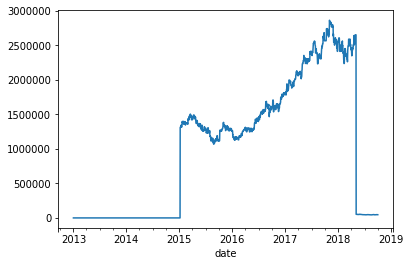

In [142]:
df2["삼성전자"].plot()

# -------------------------------------------
## R에서 가져온 데이터로 다시 돌려보자. (S&P 500)

In [421]:
df = pd.read_csv("SP500_out_2015-2018.csv", encoding="UTF-8")

In [422]:
df.date = pd.to_datetime(df.date)

In [423]:
df

,date,MMM.Adjusted,ABT.Adjusted,ABBV.Adjusted,ABMD.Adjusted,ACN.Adjusted,ATVI.Adjusted,ADBE.Adjusted,AMD.Adjusted,AAP.Adjusted,AES.Adjusted,AET.Adjusted,AMG.Adjusted,AFL.Adjusted,A.Adjusted,APD.Adjusted,AKAM.Adjusted,ALK.Adjusted,ALB.Adjusted,ARE.Adjusted,ALXN.Adjusted,ALGN.Adjusted,ALLE.Adjusted,AGN.Adjusted,ADS.Adjusted,LNT.Adjusted,ALL.Adjusted,GOOGL.Adjusted,GOOG.Adjusted,MO.Adjusted,AMZN.Adjusted,AEE.Adjusted,AAL.Adjusted,AEP.Adjusted,AXP.Adjusted,AIG.Adjusted,AMT.Adjusted,AWK.Adjusted,AMP.Adjusted,ABC.Adjusted,AME.Adjusted,AMGN.Adjusted,APH.Adjusted,APC.Adjusted,ADI.Adjusted,ANSS.Adjusted,ANTM.Adjusted,AON.Adjusted,AOS.Adjusted,APA.Adjusted,...,FOX.Adjusted,TSN.Adjusted,UDR.Adjusted,ULTA.Adjusted,USB.Adjusted,UAA.Adjusted,UNP.Adjusted,UAL.Adjusted,UNH.Adjusted,UPS.Adjusted,URI.Adjusted,UTX.Adjusted,UHS.Adjusted,UNM.Adjusted,VFC.Adjusted,VLO.Adjusted,VAR.Adjusted,VTR.Adjusted,VRSN.Adjusted,VRSK.Adjusted,VZ.Adjusted,VRTX.Adjusted,VIAB.Adjusted,V.Adjusted,VNO.Adjusted,VMC.Adjusted,WMT.Adjusted,WBA.Adjusted,DIS.Adjusted,WM.Adjusted,WAT.Adjusted,WEC.Adjusted,WCG.Adjusted,WFC.Adjusted,WELL.Adjusted,WDC.Adjusted,WU.Adjusted,WY.Adjusted,WHR.Adjusted,WMB.Adjusted,WLTW.Adjusted,WYNN.Adjusted,XEL.Adjusted,XRX.Adjusted,XLNX.Adjusted,XYL.Adjusted,YUM.Adjusted,ZBH.Adjusted,ZION.Adjusted,ZTS.Adjusted
0,2015-01-02,149.189377,41.330265,57.643887,37.310001,81.924049,19.544163,72.339996,2.670000,157.536957,11.690082,85.384224,208.315491,27.923578,39.078392,120.563065,63.250000,56.779945,56.780239,79.903641,186.600006,56.200001,53.460255,252.411591,280.009491,27.850245,65.422501,529.549988,521.937744,42.207748,308.519989,40.362579,52.049133,53.436211,87.300888,52.094139,92.394112,49.480484,120.014153,85.289673,51.302654,145.323883,51.803162,79.490265,50.688641,81.639999,118.143997,90.032600,26.306887,59.186741,...,34.919922,37.993690,27.507404,126.839996,41.003548,33.445000,108.775055,66.339996,95.040115,98.637596,103.589996,105.142891,109.593750,32.128819,66.970840,44.150955,76.307899,69.491142,57.189999,63.970001,39.009556,123.070000,67.949448,64.040596,77.157341,65.132423,77.757484,70.660721,89.130135,47.088223,113.879997,45.740639,80.870003,49.148735,63.517269,97.247604,15.765661,31.239834,176.279724,36.295483,111.899681,135.981354,31.797997,32.164562,39.751041,36.170059,47.371265,109.146660,27.144541,42.140160
1,2015-01-05,145.824738,41.339466,56.559074,37.070000,80.540825,19.272312,71.980003,2.660000,155.460419,11.357300,84.230354,200.762192,27.192112,38.346146,116.708183,61.939999,55.970554,54.897301,80.864738,182.169998,56.990002,53.353428,250.034866,276.114075,27.511013,64.125626,519.460022,511.057617,41.966412,302.190002,39.958862,52.020176,52.649738,84.992149,51.063587,91.059242,48.719112,116.161774,84.563683,49.762211,143.596954,50.856720,73.221077,49.766857,80.860001,116.072304,89.164055,25.846596,55.551891,...,34.202785,37.118740,27.796768,127.150002,40.015736,32.650002,105.097549,66.150002,93.474670,96.662689,92.250000,103.388077,107.351891,31.111494,66.407906,42.335449,75.185463,69.841866,56.240002,63.139999,38.685585,121.029999,66.056953,62.626995,77.351257,63.333431,77.531174,69.266098,87.827652,46.615059,113.019997,45.181671,79.070000,47.800972,64.301430,95.961891,15.616181,31.239834,172.644745,34.858749,111.095940,133.666992,31.437065,31.462799,39.021667,33.918922,46.408787,113.218216,26.127459,41.887180
2,2015-01-06,144.269745,40.870014,56.279121,36.130001,79.959869,18.913078,70.529999,2.630000,155.351135,11.101313,84.355370,196.436081,26.949818,37.748795,116.666718,60.669998,55.311749,53.824017,81.274078,177.949997,57.450001,53.266037,248.554260,272.601318,27.423065,64.078957,506.640015,499.212799,42.216370,295.290009,39.493713,51.209175,52.938122,83.180794,50.339413,90.818214,48.847534,113.036270,85.025665,48.806744,138.970642,50.209663,72.680130,48.598671,79.260002,117.654327,88.629570,25.635244,54.949173,...,33.724697,37.337482,27.954605,126.949997,39.485237,32.110001,102.924057,64.580002,93.286034,96.028221,89.3899

In [466]:
s2 = MovingWindow()

### 1기: 주식 선택


In [467]:
s2.get_top100() 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,firms,ipo_index,ipo_price,current_price,price_change,holding,TR,TC
7,AMD.Adjusted,0,2,11.340000,467.000000,100,1134.0000,1134.0000
343,NVDA.Adjusted,0,19,106.135986,458.610453,100,10613.5986,10613.5986
3,ABMD.Adjusted,0,37,112.680000,204.540541,100,11268.0000,11268.0000
325,NFLX.Adjusted,0,49,123.800003,152.653067,100,12380.0003,12380.0003
29,AMZN.Adjusted,0,308,749.869995,143.464284,100,74986.9995,74986.9995
294,MLM.Adjusted,0,107,218.358368,104.073241,100,21835.8368,21835.8368
444,ULTA.Adjusted,0,126,254.940002,102.333335,100,25494.0002,25494.0002
466,VMC.Adjusted,0,65,123.250145,89.615608,100,12325.0145,12325.0145
5,ATVI.Adjusted,0,19,35.706181,87.927268,100,3570.6181,3570.6181
328,NEM.Adjusted,0,18,33.427715,85.709528,100,3342.7715,3342.7715


In [468]:
s2.current_date

Timestamp('2016-12-30 00:00:00')

#### 상위 10%와 하위 10% 각 10개를 10%씩 추가 매수/ 추가 매도 한다. 
이 시점에선 주식을 사기만 했으므로 수익률은 0이다. 

In [469]:
s2.buy_and_sell()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,firms,holding
7,AMD.Adjusted,110.0
343,NVDA.Adjusted,110.0
3,ABMD.Adjusted,110.0
325,NFLX.Adjusted,110.0
29,AMZN.Adjusted,110.0
294,MLM.Adjusted,110.0
444,ULTA.Adjusted,110.0
466,VMC.Adjusted,110.0
5,ATVI.Adjusted,110.0
328,NEM.Adjusted,110.0


In [470]:
s2.balance

412   NaN
Name: current_price, dtype: float64

In [471]:
s2.total_investment

1

In [472]:
s2.investment_return()

412   NaN
Name: current_price, dtype: float64


### 2기: t(여기선 6개월)가 지난 후 100개의 포트폴리오를 재평가.

In [473]:
s2.after_t_return()

,firms,ipo_index,ipo_price,current_price,price_change,TR,TC,year_ago_price,holding,profit,return
0,NVDA.Adjusted,0,19,151.240829,232.483587,16636.49119,11674.95846,45.488209,110.0,4961.53273,42.497220
1,AMD.Adjusted,0,2,13.230000,158.398438,1455.30000,1247.40000,5.120000,110.0,207.90000,16.666667
2,ANET.Adjusted,0,62,155.270004,150.435490,15527.00040,9676.99970,62.000000,100.0,5850.00070,60.452629
3,TTWO.Adjusted,0,28,73.269997,102.683245,7326.99970,4929.00010,36.150002,100.0,2397.99960,48.650833
4,SIVB.Adjusted,0,115,176.089996,95.286681,17608.99960,17166.00040,90.169998,100.0,442.99920,2.580678
5,ALGN.Adjusted,0,56,152.240005,93.640294,15224.00050,9612.99970,78.620003,100.0,5611.00080,58.368886
6,CFG.Adjusted,0,23,34.406940,89.604527,3440.69400,3442.45530,18.146687,100.0,-1.76130,-0.051164
7,CMA.Adjusted,0,43,70.457054,88.037432,7045.70540,6625.59130,37.469696,100.0,420.11410,6.340779
8,IDXX.Adjusted,0,73,164.649994,85.982148,16464.99940,11726.99970,88.529999,100.0,4737.99970,40.402488
9,ZION.Adjusted,0,27,42.126297,77.728216,4212.62970,4203.52250,23.702650,100.0,9.10720,0.216656


In [474]:
s2.current_date

Timestamp('2017-06-28 00:00:00')

#### 이 시점에서 번 돈과(각 주식 profit의 총 합 = balance) 투자한 총 금액(각 주식 Total Cost의 총 합 = total investment), 그리고 전체 투자의 수익률을 확인한다. (%) 

In [475]:
s2.balance

180875.11555000005

In [476]:
s2.total_investment

1068746.00645

In [477]:
s2.investment_return()

16.924050659221066

In [478]:
s2.buy_and_sell()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,firms,holding
7,AMD.Adjusted,121.0
343,NVDA.Adjusted,121.0
3,ABMD.Adjusted,110.0
325,NFLX.Adjusted,110.0
29,AMZN.Adjusted,110.0
294,MLM.Adjusted,110.0
444,ULTA.Adjusted,110.0
466,VMC.Adjusted,110.0
5,ATVI.Adjusted,110.0
328,NEM.Adjusted,99.0


### 3기: t(여기선 6개월)가 지난 후 100개의 포트폴리오를 재평가.

In [479]:
s2.top100

,firms,ipo_index,ipo_price,current_price,price_change,TR,TC,year_ago_price,holding,profit,return
0,NVDA.Adjusted,0,19,151.240829,232.483587,16636.49119,13338.607579,45.488209,110.0,4961.53273,42.497220
1,AMD.Adjusted,0,2,13.230000,158.398438,1455.30000,1392.930000,5.120000,110.0,207.90000,16.666667
2,ANET.Adjusted,0,62,155.270004,150.435490,15527.00040,11229.699740,62.000000,100.0,5850.00070,60.452629
3,TTWO.Adjusted,0,28,73.269997,102.683245,7326.99970,5661.700070,36.150002,100.0,2397.99960,48.650833
4,SIVB.Adjusted,0,115,176.089996,95.286681,17608.99960,18926.900360,90.169998,100.0,442.99920,2.580678
5,ALGN.Adjusted,0,56,152.240005,93.640294,15224.00050,11135.399750,78.620003,100.0,5611.00080,58.368886
6,CFG.Adjusted,0,23,34.406940,89.604527,3440.69400,3786.524700,18.146687,100.0,-1.76130,-0.051164
7,CMA.Adjusted,0,43,70.457054,88.037432,7045.70540,7330.161840,37.469696,100.0,420.11410,6.340779
8,IDXX.Adjusted,0,73,164.649994,85.982148,16464.99940,13373.499640,88.529999,100.0,4737.99970,40.402488
9,ZION.Adjusted,0,27,42.126297,77.728216,4212.62970,4624.785470,23.702650,100.0,9.10720,0.216656


In [480]:
try:
    s2.after_t_return()
except:
    print(s2.current_date)
    s2.current_date = s2.current_date - np.timedelta64(4,'D') - t
    print(s2.current_date)
    s2.after_t_return()

2017-12-25 00:00:00
2017-06-24 00:00:00


In [482]:
s2.balance

340439.30173600005

In [483]:
s2.total_investment

1079240.288439

In [484]:
s2.investment_return()

31.544347017327095

### 4기: t(여기선 6개월)가 지난 후 100개의 포트폴리오를 재평가.

In [485]:
try:
    s2.current_date
    print(s2.current_date)
    s2.after_t_return()
except:
    print(s2.current_date)
    s2.current_date = s2.current_date - np.timedelta64(60,'D') - t
    print(s2.current_date)
    print('adjusted a day')
    s2.after_t_return()

2017-12-21 00:00:00


In [489]:
s2.current_date

Timestamp('2018-06-19 00:00:00')

In [486]:
s2.balance

581162.7825900002

In [487]:
s2.total_investment

1079240.288439

In [488]:
s2.investment_return()

53.8492482921099